## Given a list of probabilities choose a number from a list where the probability of choosing a number is proportional to its weight

In [17]:
# list_d is the list of numbers and weights is weight probability
list_d=[1,2,3,4,5,6]
weights=[20, 12, 60, 58, 33, 10]

In [18]:
total_sum=sum(weights)
normalized_wts=[i/total_sum for i in weights]

print(total_sum)
print(normalized_wts)

193
[0.10362694300518134, 0.06217616580310881, 0.31088082901554404, 0.3005181347150259, 0.17098445595854922, 0.05181347150259067]


In [19]:
print(sum(normalized_wts))

1.0


In [20]:
cum_sum=[normalized_wts[0]]
for i in range(1, len(normalized_wts)):
    cum_sum.append(cum_sum[i-1]+normalized_wts[i])
print(cum_sum)

[0.10362694300518134, 0.16580310880829013, 0.47668393782383417, 0.7772020725388601, 0.9481865284974094, 1.0]


In [50]:
from random import uniform

def proportional_sampling(given_list, weights):
    total_sum=sum(weights)
    normalized_wts=[i/total_sum for i in weights]
    r=uniform(0,1)

    cum_sum=[normalized_wts[0]]
    for i in range(1, len(normalized_wts)):
        cum_sum.append(cum_sum[i-1]+normalized_wts[i])
        
        for index, value in enumerate(cum_sum):
            if r<=value:
                return given_list[index]



In [51]:
sampled_list=proportional_sampling(list_d, weights)
sampled_list

3

In [52]:
sampled_result=[]
for i in range(1,10000):
    sampled_result.append(proportional_sampling(list_d, weights))
sampled_result

[6,
 5,
 4,
 4,
 2,
 3,
 4,
 3,
 1,
 5,
 6,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 2,
 2,
 3,
 3,
 3,
 5,
 4,
 5,
 3,
 3,
 4,
 2,
 3,
 3,
 5,
 4,
 5,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 1,
 4,
 4,
 5,
 5,
 4,
 5,
 1,
 4,
 4,
 4,
 5,
 6,
 5,
 4,
 3,
 3,
 3,
 4,
 3,
 2,
 2,
 5,
 4,
 4,
 3,
 1,
 4,
 3,
 5,
 4,
 3,
 3,
 3,
 6,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 2,
 1,
 2,
 1,
 5,
 4,
 5,
 3,
 5,
 3,
 5,
 4,
 3,
 3,
 1,
 5,
 5,
 4,
 3,
 4,
 4,
 4,
 2,
 3,
 5,
 5,
 4,
 3,
 5,
 1,
 1,
 2,
 4,
 4,
 2,
 4,
 6,
 3,
 4,
 4,
 5,
 1,
 4,
 4,
 5,
 4,
 4,
 5,
 3,
 5,
 4,
 3,
 1,
 2,
 3,
 5,
 5,
 6,
 4,
 3,
 4,
 4,
 1,
 4,
 3,
 4,
 5,
 4,
 3,
 4,
 4,
 5,
 1,
 5,
 3,
 3,
 6,
 4,
 3,
 3,
 5,
 4,
 2,
 5,
 4,
 6,
 4,
 5,
 1,
 3,
 3,
 4,
 1,
 5,
 3,
 5,
 3,
 4,
 5,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 4,
 3,
 4,
 5,
 4,
 3,
 4,
 1,
 3,
 3,
 3,
 4,
 6,
 5,
 4,
 4,
 4,
 5,
 4,
 3,
 4,
 1,
 5,
 4,
 3,
 5,
 4,
 1,
 4,
 4,
 3,
 4,
 3,
 6,
 1,
 4,
 4,
 6,
 4,
 3,
 5,
 3,
 1,
 4,
 4,
 4,
 5,


sampled_result

In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
x=np.array(sampled_result)
x
x.shape
x.ndim

1

(array([1024.,    0.,  588.,    0., 3127.,    0., 3004.,    0., 1733.,
         523.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

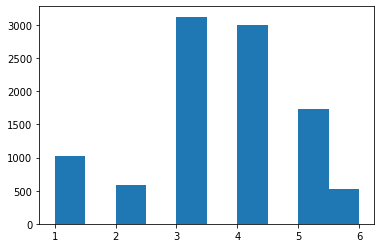

In [57]:
plt.hist(x, cumulative=False)


(array([1024., 1024., 1612., 1612., 4739., 4739., 7743., 7743., 9476.,
        9999.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

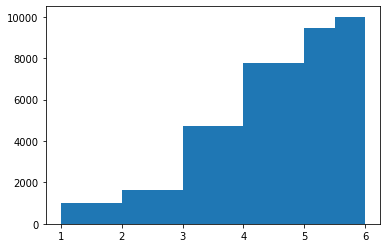

In [62]:
plt.hist(x, cumulative=True, histtype='bar')